## SRTP-Week01
### 1.1 从数据开始
    面对这个深度学习的项目，明明已经看过了论文，知道了模型的大概结构，依然有种无从下手的感觉。想了想，是我对这个项目还不够理解深刻。理解，从数据开始。
    来看看已经有什么吧，BJ13_M32x32_T30_InOut.h5，都是类似的文件，都是h5结尾。h5是个啥？
   > HDF 是用于存储和分发科学数据的一种自我描述、多对象文件格式。HDF 是由美国国家超级计算应用中心（NCSA）创建的，以满足不同群体的科学家在不同工程项目领域之需要。
   
   >h5py文件是存放两类对象的容器，数据集(dataset)和组(group)，dataset类似数组类的数据集合，和numpy的数组差不多。group是像文件夹一样的容器，它好比python中的字典，有键(key)和值(value)。group中可以存放dataset或者其他的group。”键”就是组成员的名称，”值”就是组成员对象本身(组或者数据集)。
   
   看来就是一种厉害的存储格式。查了一下，有个python的借口h5py可以用来读取。先来看看这里到底是个啥
   根据附带的readme文件，这里的每个h5都有两部分组成：
   * date，时间戳，和data相联系
   * data，正经数据，4个维度，第一维和date相联系（每个时间戳一个），第二维是inflow、outflow（两个），之后就是具体的数据了（32x32）
 

In [1]:
%matplotlib inline
import h5py
data_Path='../data/TaxiBJ/BJ16_M32x32_T30_InOut.h5'
reader=h5py.File(data_Path,'r')
for key in reader.keys():
    print(key,reader[key].shape,type(reader[key]))

data (7220, 2, 32, 32) <class 'h5py._hl.dataset.Dataset'>
date (7220,) <class 'h5py._hl.dataset.Dataset'>


In [2]:
reader_mete=h5py.File('../data/TaxiBJ/BJ_Meteorology.h5','r')

### 1.2 数据清洗
    感觉有点不太对？365*48（半小时采集一次）=17520，怎么也应该有一万七千多次啊，怎么这里只有7220个时间戳？算了一下这样大概能有150天的有效数据。

In [3]:
for time_value in reader['date']:
    print(time_value)

b'2015110101'
b'2015110102'
b'2015110103'
b'2015110104'
b'2015110125'
b'2015110126'
b'2015110127'
b'2015110128'
b'2015110129'
b'2015110130'
b'2015110131'
b'2015110132'
b'2015110133'
b'2015110134'
b'2015110135'
b'2015110136'
b'2015110137'
b'2015110138'
b'2015110139'
b'2015110140'
b'2015110141'
b'2015110142'
b'2015110143'
b'2015110144'
b'2015110145'
b'2015110146'
b'2015110147'
b'2015110148'
b'2015110201'
b'2015110202'
b'2015110203'
b'2015110204'
b'2015110205'
b'2015110206'
b'2015110207'
b'2015110208'
b'2015110209'
b'2015110210'
b'2015110211'
b'2015110212'
b'2015110213'
b'2015110214'
b'2015110215'
b'2015110216'
b'2015110217'
b'2015110218'
b'2015110219'
b'2015110220'
b'2015110221'
b'2015110222'
b'2015110223'
b'2015110224'
b'2015110225'
b'2015110226'
b'2015110227'
b'2015110228'
b'2015110229'
b'2015110230'
b'2015110231'
b'2015110232'
b'2015110233'
b'2015110234'
b'2015110235'
b'2015110236'
b'2015110237'
b'2015110238'
b'2015110239'
b'2015110240'
b'2015110241'
b'2015110242'
b'2015110243'
b'2015

b'2015112331'
b'2015112332'
b'2015112333'
b'2015112334'
b'2015112335'
b'2015112336'
b'2015112337'
b'2015112338'
b'2015112339'
b'2015112340'
b'2015112341'
b'2015112342'
b'2015112343'
b'2015112344'
b'2015112345'
b'2015112346'
b'2015112347'
b'2015112348'
b'2015112401'
b'2015112402'
b'2015112403'
b'2015112404'
b'2015112405'
b'2015112406'
b'2015112407'
b'2015112408'
b'2015112409'
b'2015112410'
b'2015112411'
b'2015112412'
b'2015112413'
b'2015112414'
b'2015112415'
b'2015112416'
b'2015112417'
b'2015112418'
b'2015112419'
b'2015112420'
b'2015112421'
b'2015112423'
b'2015112425'
b'2015112426'
b'2015112427'
b'2015112428'
b'2015112429'
b'2015112430'
b'2015112431'
b'2015112432'
b'2015112433'
b'2015112434'
b'2015112435'
b'2015112437'
b'2015112440'
b'2015112441'
b'2015112442'
b'2015112443'
b'2015112444'
b'2015112445'
b'2015112446'
b'2015112447'
b'2015112448'
b'2015112501'
b'2015112502'
b'2015112503'
b'2015112504'
b'2015112505'
b'2015112506'
b'2015112507'
b'2015112508'
b'2015112509'
b'2015112510'
b'2015

b'2015121640'
b'2015121641'
b'2015121642'
b'2015121643'
b'2015121644'
b'2015121645'
b'2015121646'
b'2015121647'
b'2015121648'
b'2015121701'
b'2015121702'
b'2015121703'
b'2015121704'
b'2015121705'
b'2015121706'
b'2015121707'
b'2015121708'
b'2015121709'
b'2015121710'
b'2015121711'
b'2015121712'
b'2015121713'
b'2015121714'
b'2015121715'
b'2015121716'
b'2015121717'
b'2015121718'
b'2015121719'
b'2015121720'
b'2015121721'
b'2015121722'
b'2015121723'
b'2015121724'
b'2015121801'
b'2015121802'
b'2015121803'
b'2015121804'
b'2015121805'
b'2015121806'
b'2015121807'
b'2015121808'
b'2015121809'
b'2015121810'
b'2015121811'
b'2015121812'
b'2015121813'
b'2015121814'
b'2015121815'
b'2015121816'
b'2015121817'
b'2015121818'
b'2015121819'
b'2015121820'
b'2015121821'
b'2015121822'
b'2015121823'
b'2015121824'
b'2015121825'
b'2015121826'
b'2015121827'
b'2015121828'
b'2015121829'
b'2015121830'
b'2015121831'
b'2015121832'
b'2015121833'
b'2015121834'
b'2015121835'
b'2015121836'
b'2015121837'
b'2015121838'
b'2015

b'2016010912'
b'2016010913'
b'2016010914'
b'2016010915'
b'2016010916'
b'2016010917'
b'2016010918'
b'2016010919'
b'2016010920'
b'2016010921'
b'2016010922'
b'2016010923'
b'2016010924'
b'2016010925'
b'2016010926'
b'2016010927'
b'2016010928'
b'2016010929'
b'2016010930'
b'2016010931'
b'2016010932'
b'2016010933'
b'2016010934'
b'2016010935'
b'2016010936'
b'2016010937'
b'2016010938'
b'2016010939'
b'2016010940'
b'2016010941'
b'2016010942'
b'2016010943'
b'2016010944'
b'2016010945'
b'2016010946'
b'2016010947'
b'2016010948'
b'2016011001'
b'2016011002'
b'2016011003'
b'2016011004'
b'2016011005'
b'2016011006'
b'2016011007'
b'2016011008'
b'2016011009'
b'2016011010'
b'2016011011'
b'2016011012'
b'2016011013'
b'2016011014'
b'2016011015'
b'2016011016'
b'2016011017'
b'2016011018'
b'2016011019'
b'2016011020'
b'2016011021'
b'2016011022'
b'2016011023'
b'2016011024'
b'2016011025'
b'2016011026'
b'2016011027'
b'2016011028'
b'2016011029'
b'2016011030'
b'2016011031'
b'2016011032'
b'2016011033'
b'2016011034'
b'2016

b'2016012924'
b'2016012925'
b'2016012926'
b'2016012927'
b'2016012928'
b'2016012929'
b'2016012930'
b'2016012931'
b'2016012932'
b'2016012933'
b'2016012934'
b'2016012935'
b'2016012936'
b'2016012937'
b'2016012938'
b'2016012939'
b'2016012940'
b'2016012941'
b'2016012942'
b'2016012943'
b'2016012944'
b'2016012945'
b'2016012946'
b'2016012947'
b'2016012948'
b'2016013001'
b'2016013002'
b'2016013003'
b'2016013004'
b'2016013005'
b'2016013006'
b'2016013007'
b'2016013008'
b'2016013009'
b'2016013010'
b'2016013011'
b'2016013012'
b'2016013013'
b'2016013014'
b'2016013015'
b'2016013016'
b'2016013017'
b'2016013018'
b'2016013019'
b'2016013020'
b'2016013021'
b'2016013022'
b'2016013023'
b'2016013024'
b'2016013025'
b'2016013026'
b'2016013027'
b'2016013028'
b'2016013029'
b'2016013030'
b'2016013031'
b'2016013032'
b'2016013033'
b'2016013034'
b'2016013035'
b'2016013036'
b'2016013037'
b'2016013038'
b'2016013039'
b'2016013040'
b'2016013041'
b'2016013042'
b'2016013043'
b'2016013044'
b'2016013045'
b'2016013046'
b'2016

b'2016021710'
b'2016021711'
b'2016021712'
b'2016021713'
b'2016021714'
b'2016021715'
b'2016021716'
b'2016021717'
b'2016021718'
b'2016021719'
b'2016021720'
b'2016021721'
b'2016021722'
b'2016021723'
b'2016021724'
b'2016021725'
b'2016021726'
b'2016021727'
b'2016021728'
b'2016021729'
b'2016021730'
b'2016021731'
b'2016021732'
b'2016021733'
b'2016021734'
b'2016021735'
b'2016021736'
b'2016021737'
b'2016021738'
b'2016021739'
b'2016021740'
b'2016021741'
b'2016021742'
b'2016021743'
b'2016021744'
b'2016021745'
b'2016021746'
b'2016021747'
b'2016021748'
b'2016021801'
b'2016021802'
b'2016021803'
b'2016021804'
b'2016021805'
b'2016021806'
b'2016021807'
b'2016021808'
b'2016021809'
b'2016021810'
b'2016021811'
b'2016021812'
b'2016021813'
b'2016021814'
b'2016021815'
b'2016021816'
b'2016021817'
b'2016021818'
b'2016021819'
b'2016021820'
b'2016021821'
b'2016021822'
b'2016021823'
b'2016021824'
b'2016021825'
b'2016021826'
b'2016021827'
b'2016021828'
b'2016021829'
b'2016021830'
b'2016021831'
b'2016021832'
b'2016

b'2016031038'
b'2016031039'
b'2016031040'
b'2016031041'
b'2016031042'
b'2016031043'
b'2016031044'
b'2016031045'
b'2016031046'
b'2016031047'
b'2016031048'
b'2016031101'
b'2016031102'
b'2016031103'
b'2016031104'
b'2016031105'
b'2016031106'
b'2016031107'
b'2016031108'
b'2016031109'
b'2016031110'
b'2016031111'
b'2016031112'
b'2016031113'
b'2016031114'
b'2016031115'
b'2016031116'
b'2016031117'
b'2016031118'
b'2016031119'
b'2016031120'
b'2016031121'
b'2016031122'
b'2016031123'
b'2016031124'
b'2016031125'
b'2016031126'
b'2016031127'
b'2016031128'
b'2016031129'
b'2016031130'
b'2016031131'
b'2016031132'
b'2016031133'
b'2016031134'
b'2016031135'
b'2016031136'
b'2016031137'
b'2016031138'
b'2016031139'
b'2016031140'
b'2016031141'
b'2016031142'
b'2016031143'
b'2016031144'
b'2016031145'
b'2016031146'
b'2016031147'
b'2016031148'
b'2016031201'
b'2016031202'
b'2016031203'
b'2016031204'
b'2016031205'
b'2016031206'
b'2016031207'
b'2016031208'
b'2016031209'
b'2016031210'
b'2016031211'
b'2016031212'
b'2016

b'2016040218'
b'2016040219'
b'2016040220'
b'2016040221'
b'2016040222'
b'2016040223'
b'2016040224'
b'2016040225'
b'2016040226'
b'2016040227'
b'2016040228'
b'2016040229'
b'2016040230'
b'2016040231'
b'2016040232'
b'2016040233'
b'2016040234'
b'2016040235'
b'2016040236'
b'2016040237'
b'2016040238'
b'2016040239'
b'2016040240'
b'2016040241'
b'2016040242'
b'2016040243'
b'2016040244'
b'2016040245'
b'2016040246'
b'2016040247'
b'2016040248'
b'2016040301'
b'2016040302'
b'2016040303'
b'2016040304'
b'2016040305'
b'2016040306'
b'2016040307'
b'2016040308'
b'2016040309'
b'2016040310'
b'2016040311'
b'2016040312'
b'2016040313'
b'2016040314'
b'2016040315'
b'2016040316'
b'2016040317'
b'2016040318'
b'2016040319'
b'2016040320'
b'2016040321'
b'2016040322'
b'2016040323'
b'2016040324'
b'2016040325'
b'2016040326'
b'2016040327'
b'2016040328'
b'2016040329'
b'2016040330'
b'2016040331'
b'2016040332'
b'2016040333'
b'2016040334'
b'2016040335'
b'2016040336'
b'2016040337'
b'2016040338'
b'2016040339'
b'2016040340'
b'2016

       原来数据也不像描述的那样精确，这数据甚至不是从16年开始，而是从15年11月到16年4月，所幸其中大部分数据都是完整的，每天都有48个时间戳，要是都像第一天那样中间少几个数据，怕是做不下去咯。
       为了能够正常的进行操作，还得进行一下验证、筛选，把无效的数据给去掉

In [20]:
from datetime import datetime,timedelta
timeslot_now=reader['date'][0]
year_now=int(timeslot_now[0:4])
month_now=int(timeslot_now[4:6])
day_now=int(timeslot_now[6:8])
count=1 #用于统计每天是否有48个时间戳
break_count=0 #用于统计总共中断了几次
start_date=datetime(year_now,month_now,day_now)
start_date_str=start_date.strftime('%Y%m%d')

In [21]:
day=[]
for timeslot in reader['date'][1:]:
    if timeslot[0:8].decode('utf-8')==start_date_str:
        count=count+1
    else : #进入下一天
        if count!=48:
            day.append(1)
            break_count+=1
            print(timeslot,end=' ')
        else:
            day.append(0)
        start_date+=timedelta(days=1)
        start_date_str=start_date.strftime('%Y%m%d')
        count=1
print(break_count,end=' ')
        
    

b'2015110201' b'2015110401' b'2015111001' b'2015111101' b'2015111301' b'2015112201' b'2015112501' b'2015112901' b'2015120201' b'2015120401' b'2015120701' b'2015120902' b'2015121001' b'2015121101' b'2015121201' b'2015121301' b'2015121801' b'2015122801' b'2015123001' b'2016011201' b'2016012801' b'2016022802' b'2016022803' b'2016022901' b'2016032401' 25 

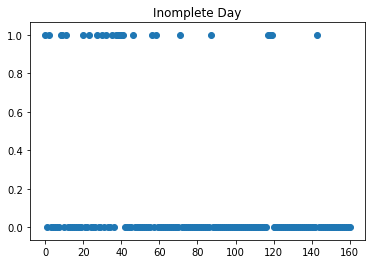

In [25]:
%matplotlib inline
plt.scatter([x for x in range(len(day))],day)
plt.title('Inomplete Day')
plt.savefig('../extra/incomplete.jpg')

    看来错误还不少啊，目前还没有想好该如何处理这样的数据，有大概两种想法：
   * 直接将这些天的数据删掉，当这一整天都是不存在的
   * 用一些虚假的数据填充，如何填充也让无从下手
   
### 1.3 数据可视化
    看过了数据的可靠性，感觉还是不怎么清楚，所以再找把矩阵可视化一下，看看数据到底表示的是怎样的一副情景，就拿第一次和一百次的看看吧

In [9]:
print(reader['data'][0][0])
print(reader['data'][0][1])


[[  0.   9.  20. ...   3.   7.  35.]
 [  0.   8.   5. ...  21.  13.  89.]
 [  0.   5.   8. ...   7. 247. 227.]
 ...
 [  0.   0.   3. ...   5.   2.   1.]
 [  0.   1.   2. ...  12.   0.   8.]
 [  0.   1.   0. ...  20.  18.   9.]]
[[  0.   7.  20. ...   2.   6.  37.]
 [  0.   8.   5. ...  20.  14.  84.]
 [  0.   5.   9. ...   7. 258. 218.]
 ...
 [  0.   1.   2. ...   5.   2.   2.]
 [  0.   1.   2. ...  12.   0.   7.]
 [  0.   1.   0. ...  23.  15.   7.]]


c:\users\hu\miniconda3\envs\pytorch11\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


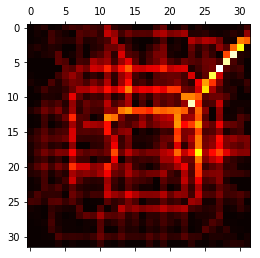

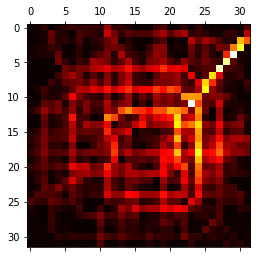

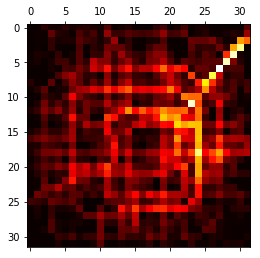

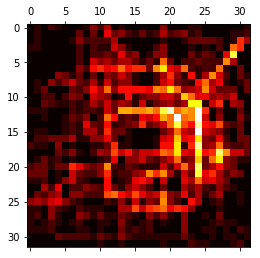

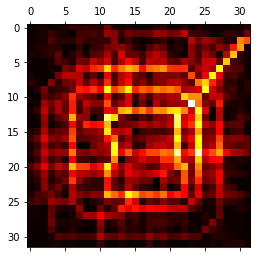

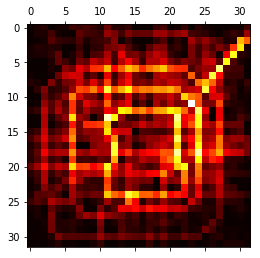

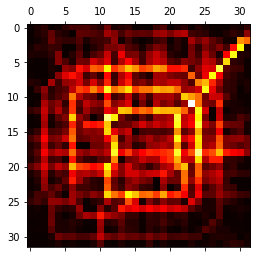

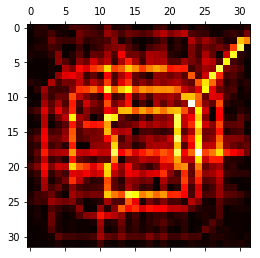

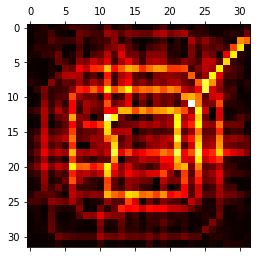

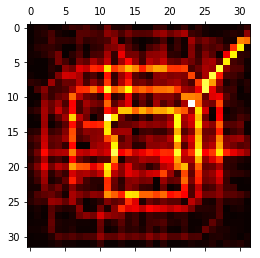

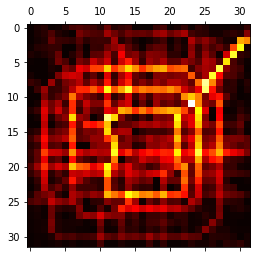

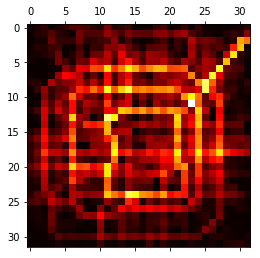

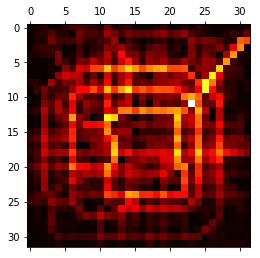

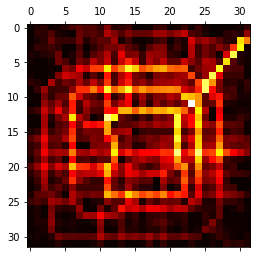

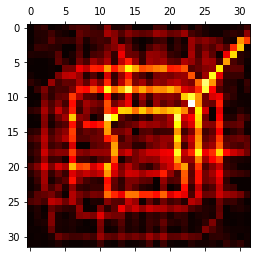

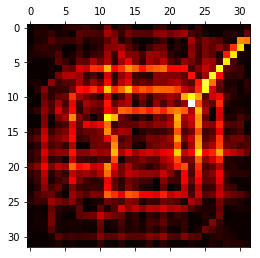

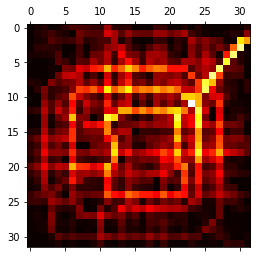

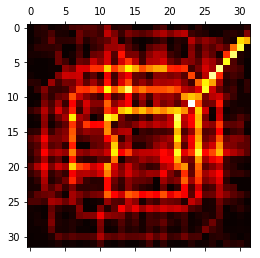

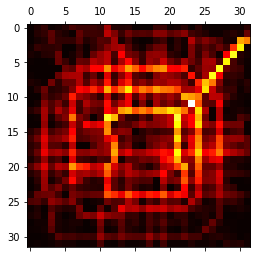

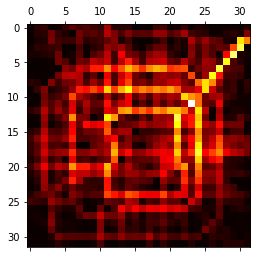

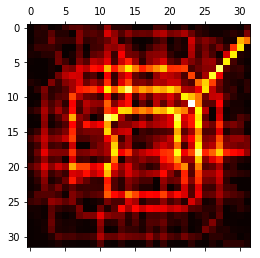

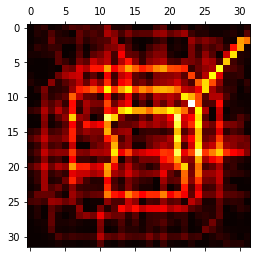

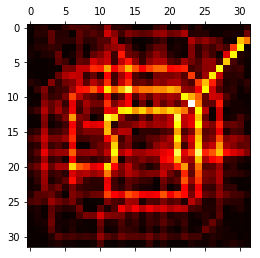

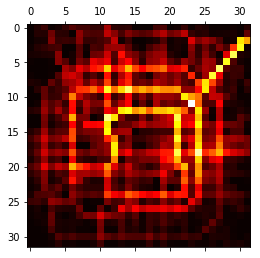

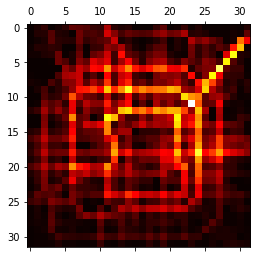

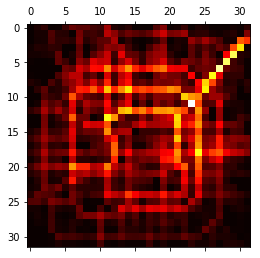

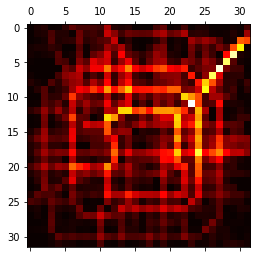

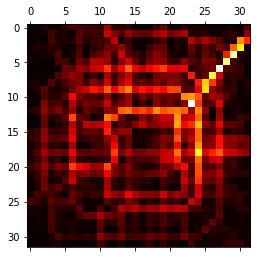

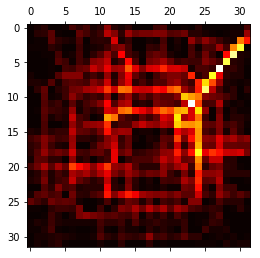

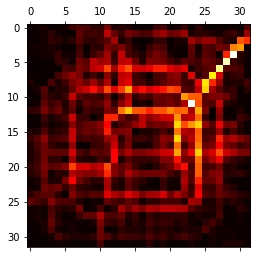

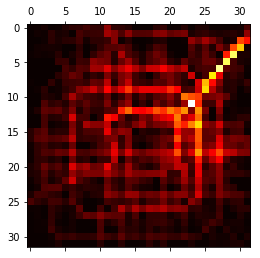

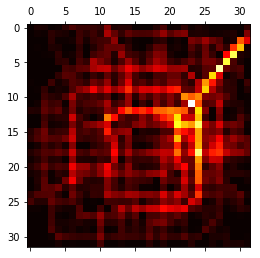

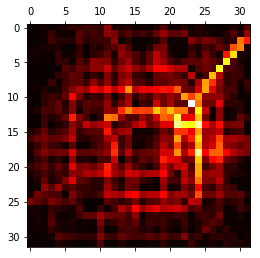

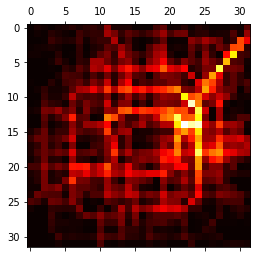

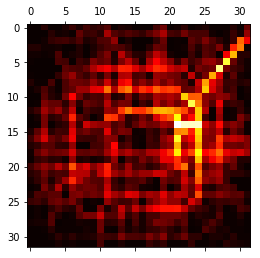

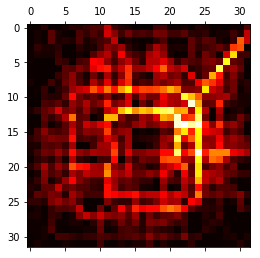

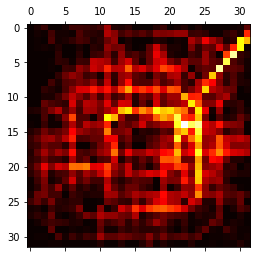

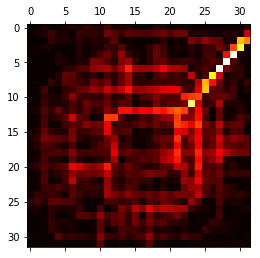

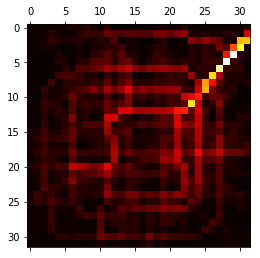

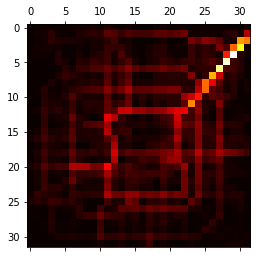

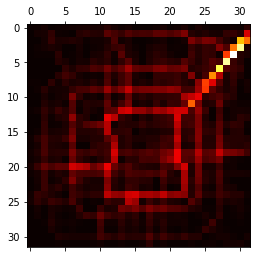

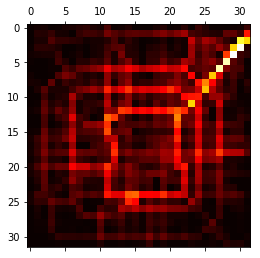

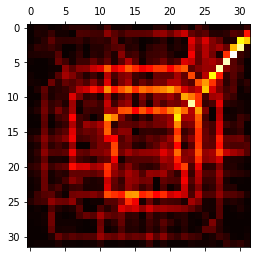

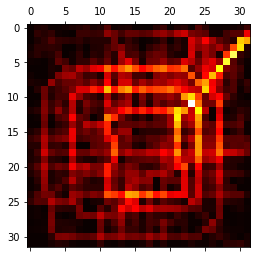

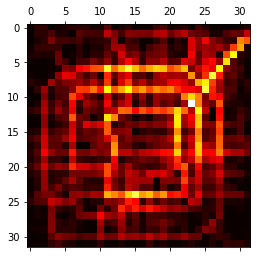

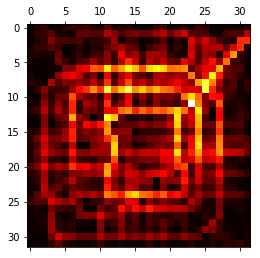

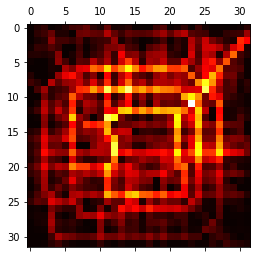

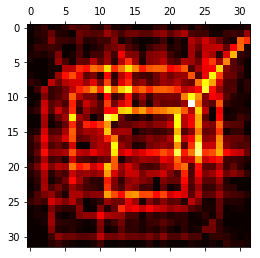

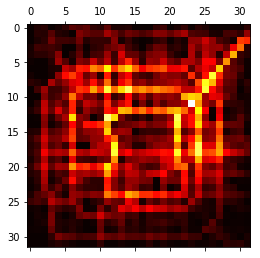

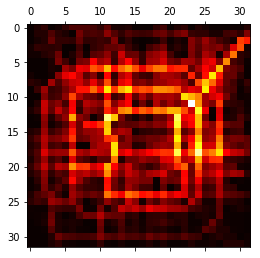

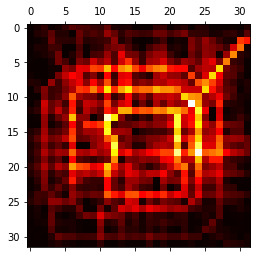

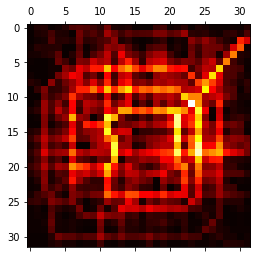

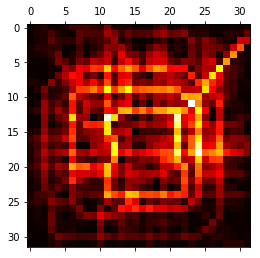

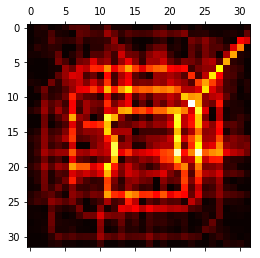

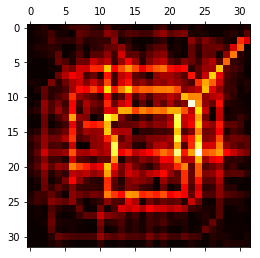

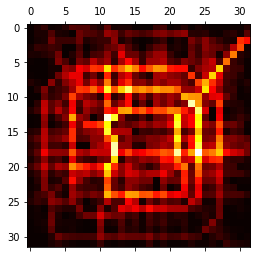

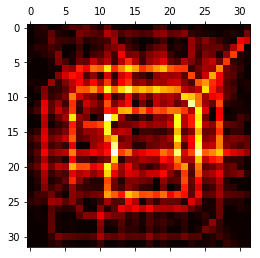

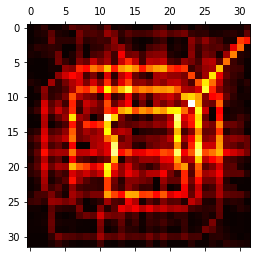

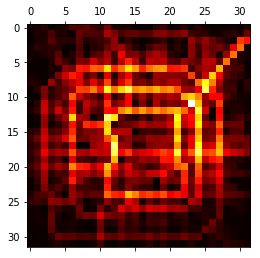

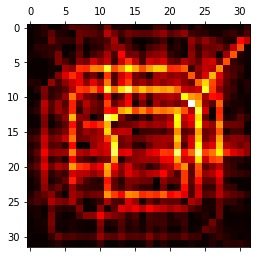

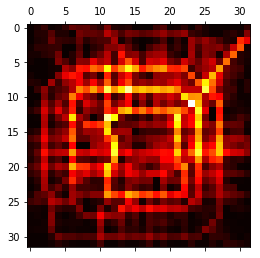

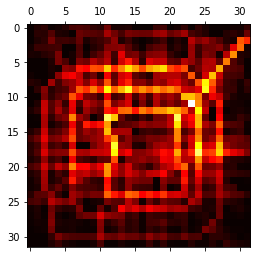

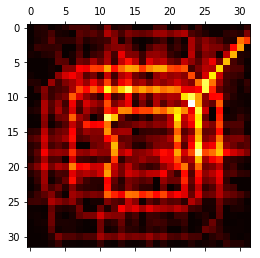

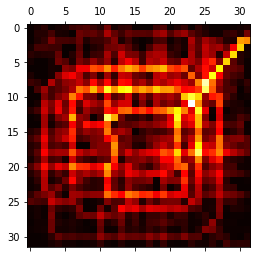

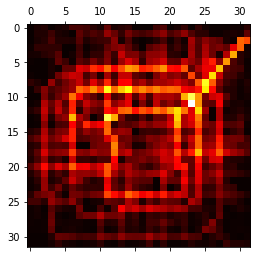

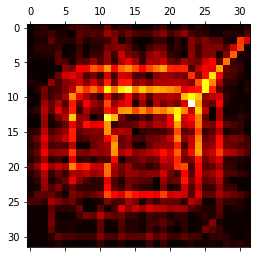

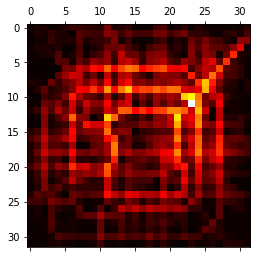

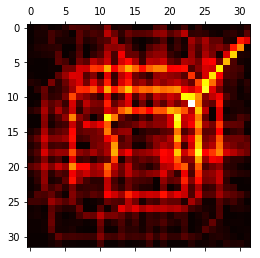

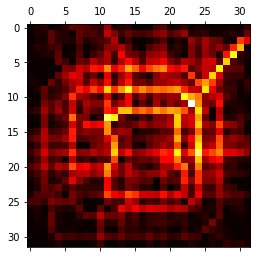

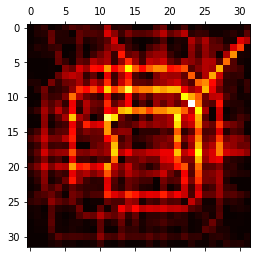

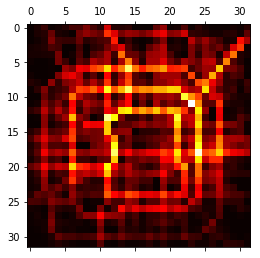

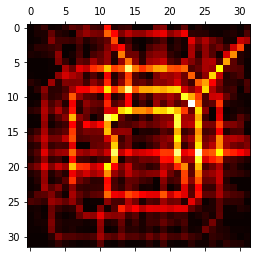

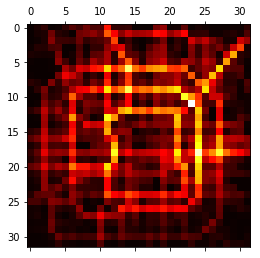

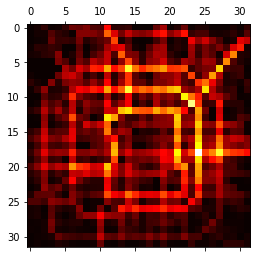

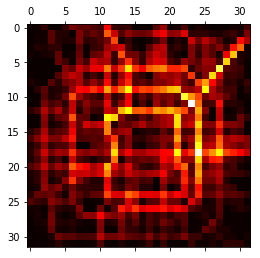

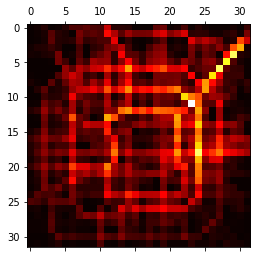

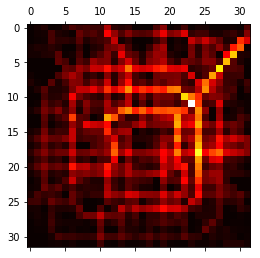

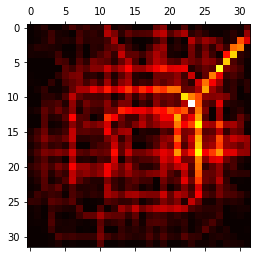

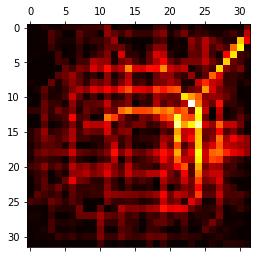

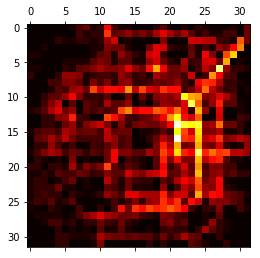

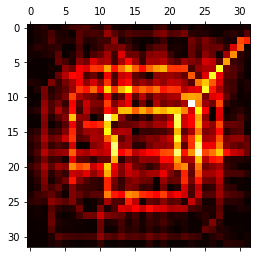

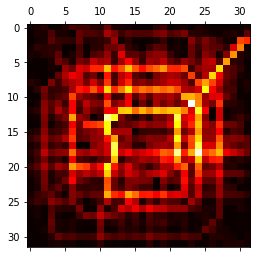

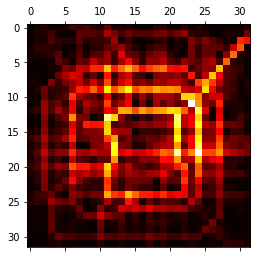

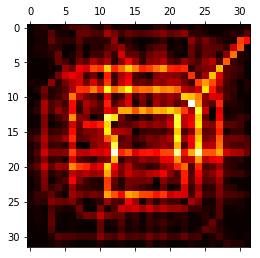

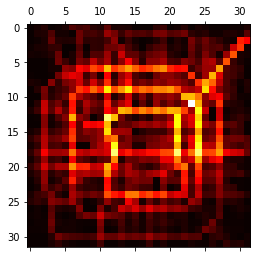

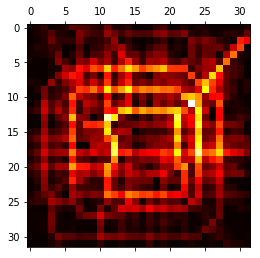

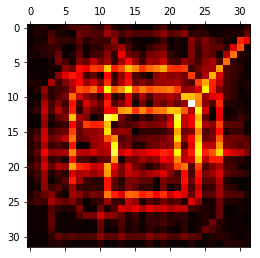

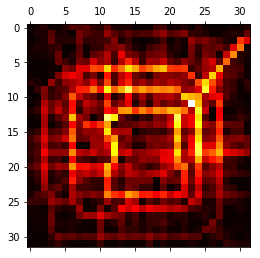

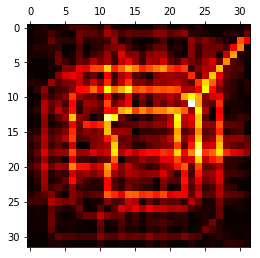

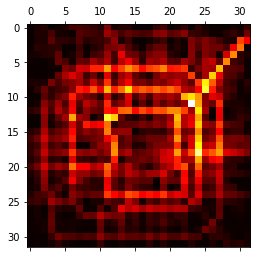

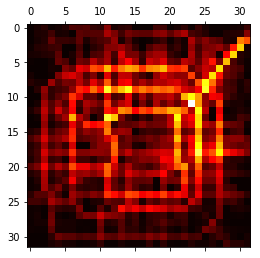

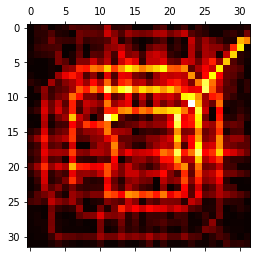

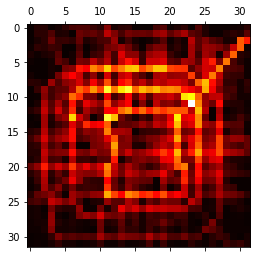

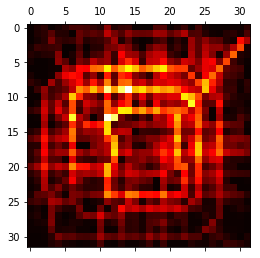

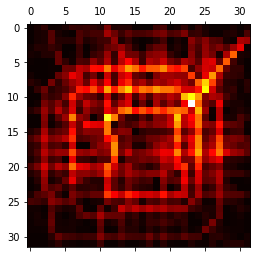

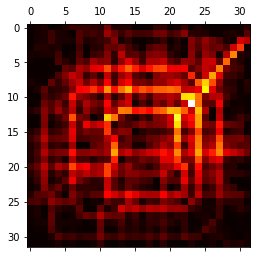

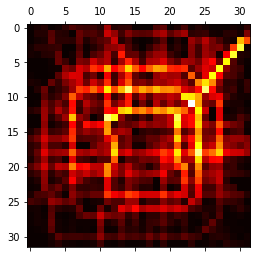

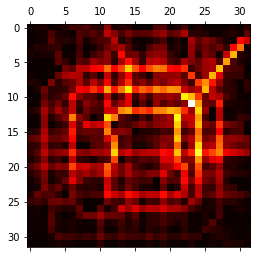

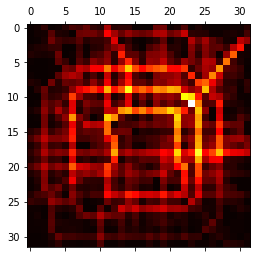

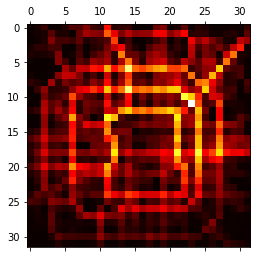

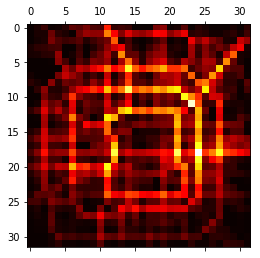

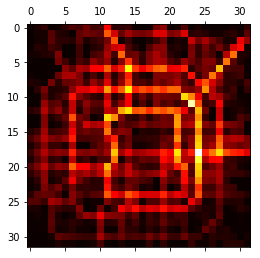

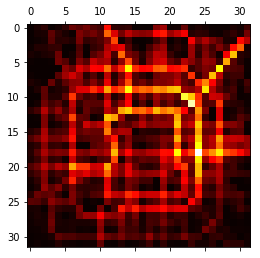

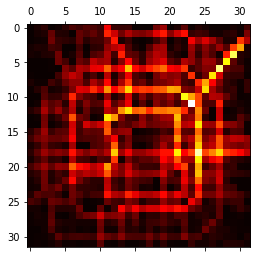

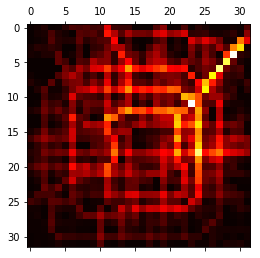

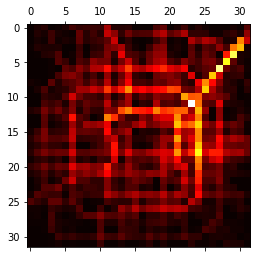

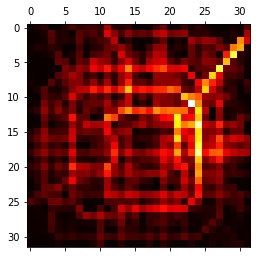

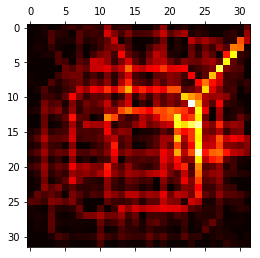

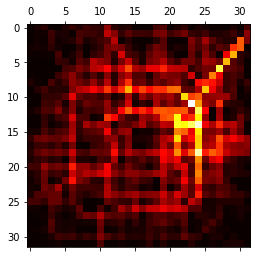

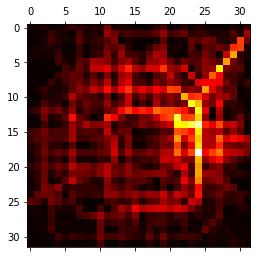

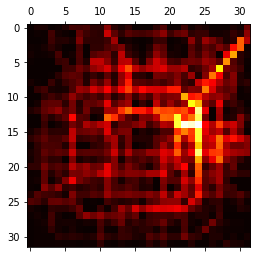

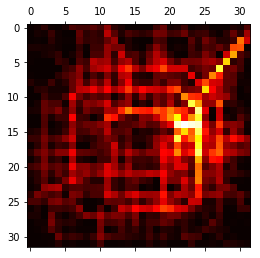

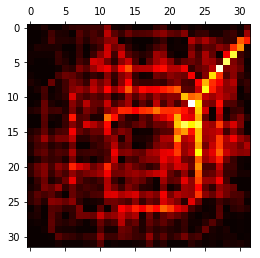

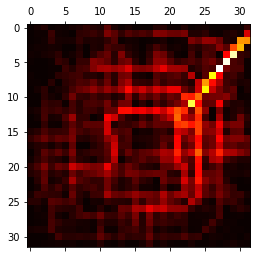

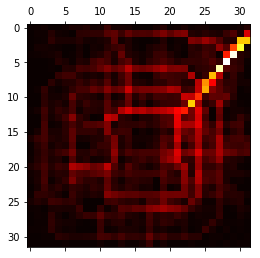

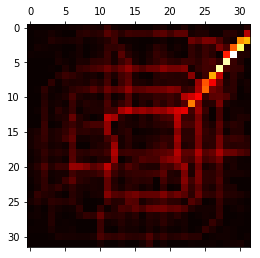

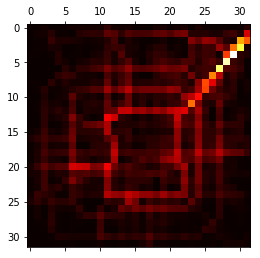

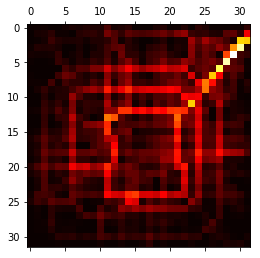

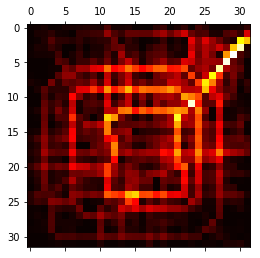

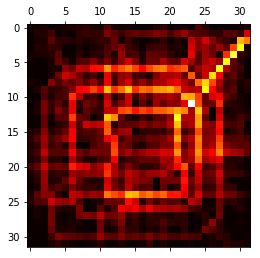

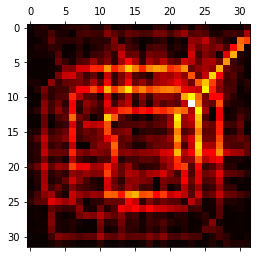

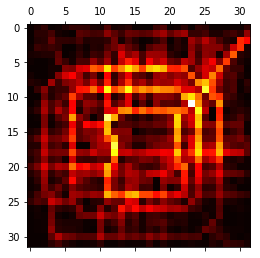

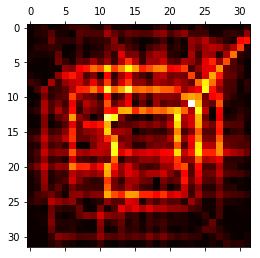

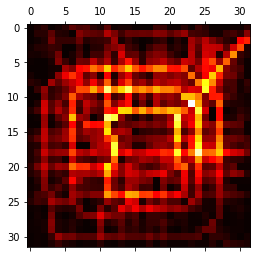

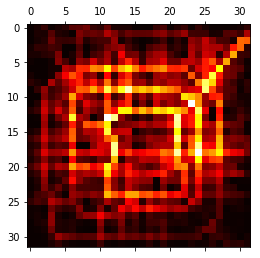

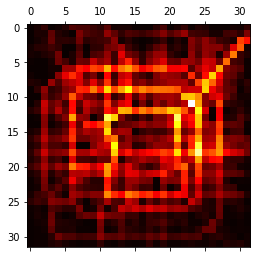

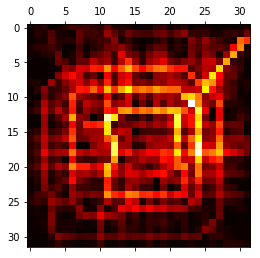

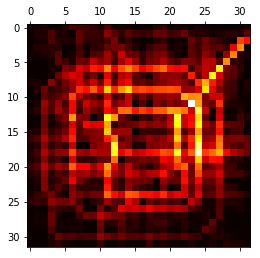

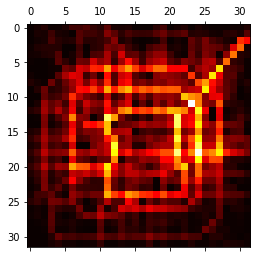

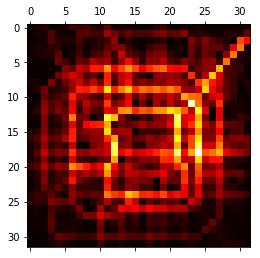

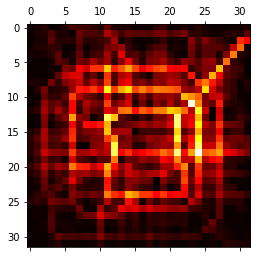

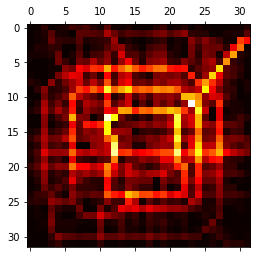

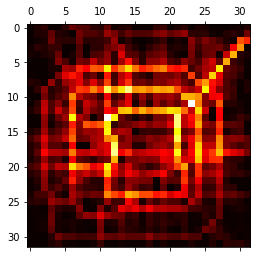

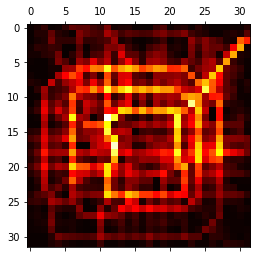

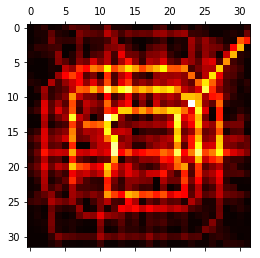

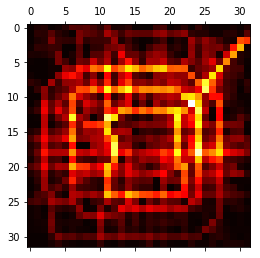

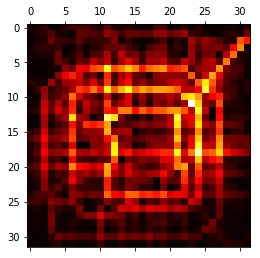

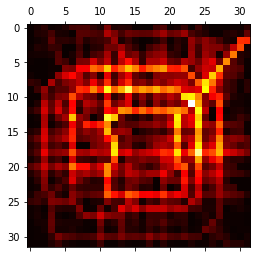

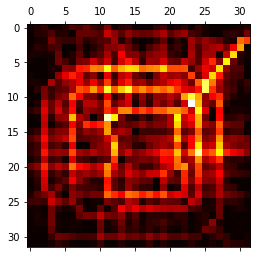

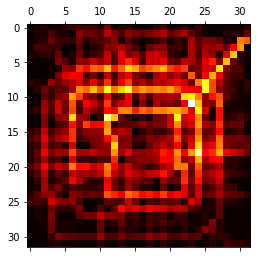

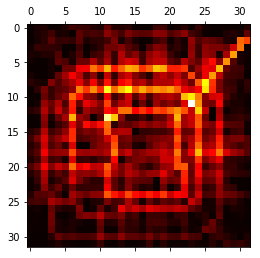

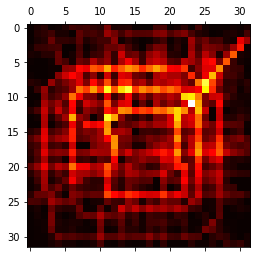

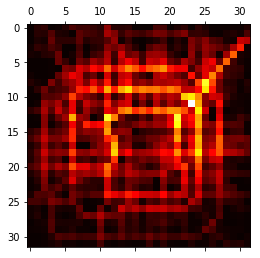

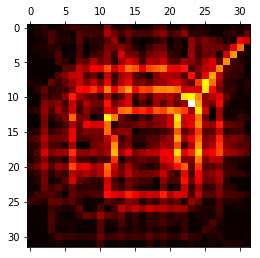

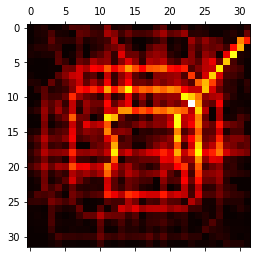

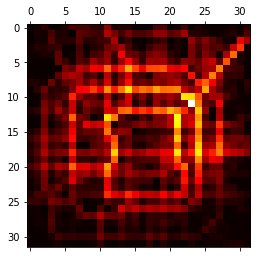

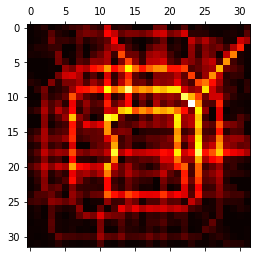

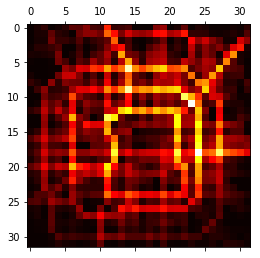

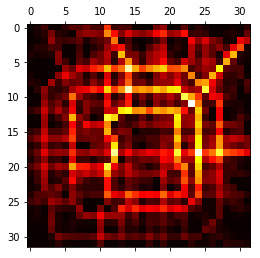

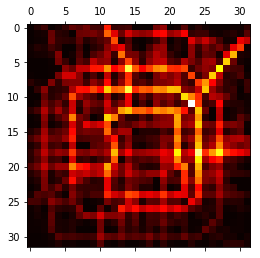

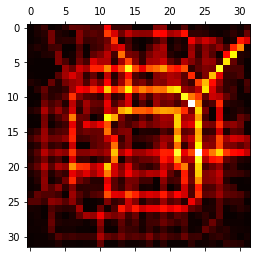

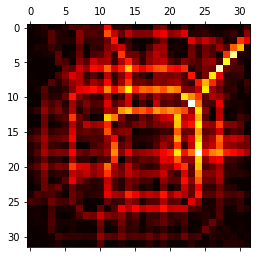

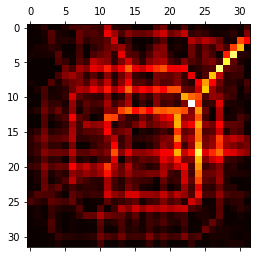

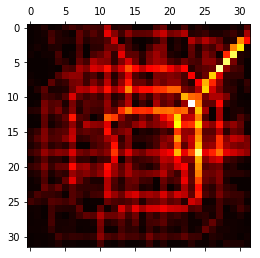

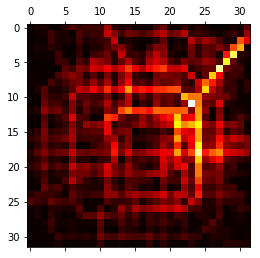

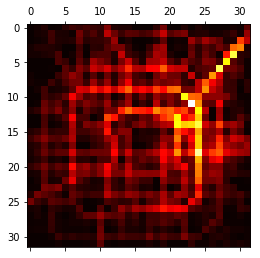

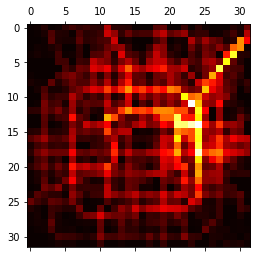

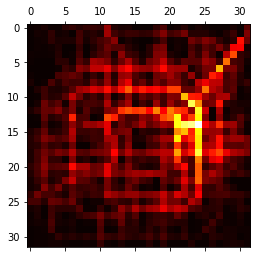

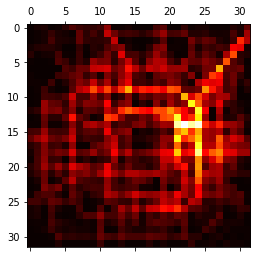

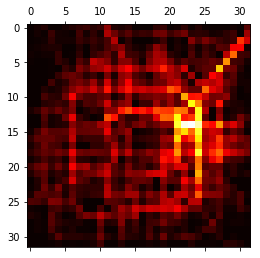

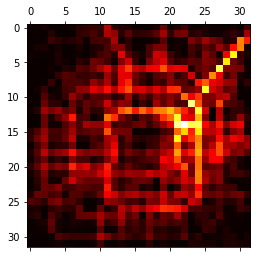

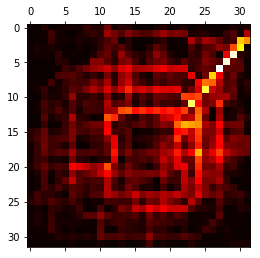

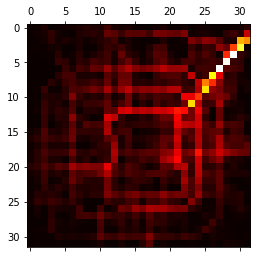

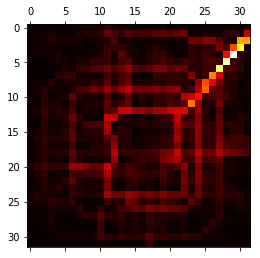

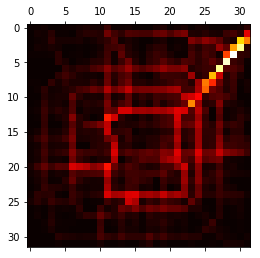

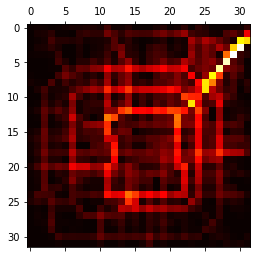

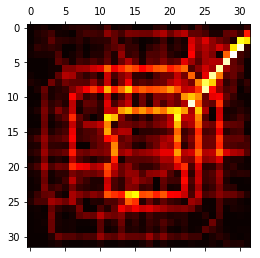

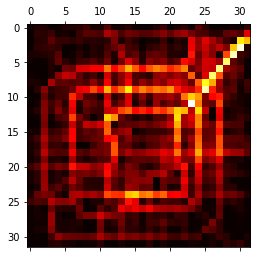

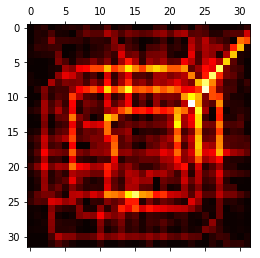

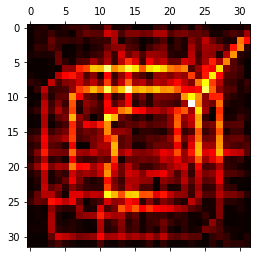

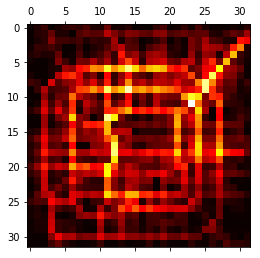

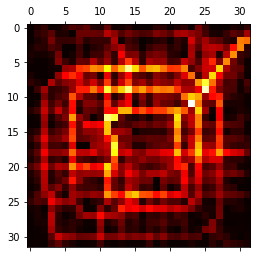

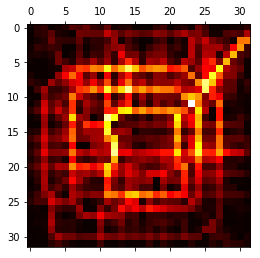

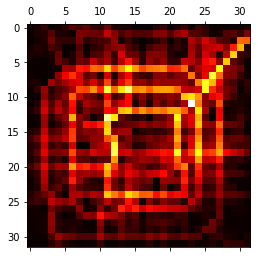

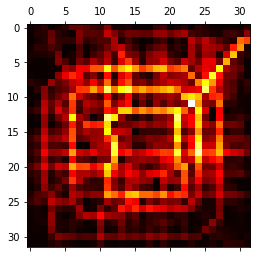

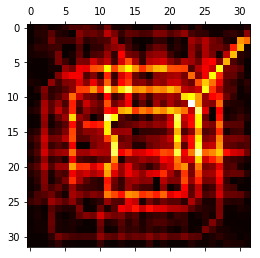

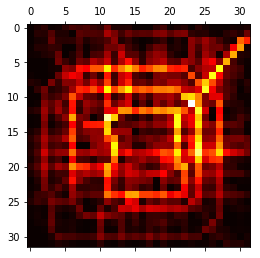

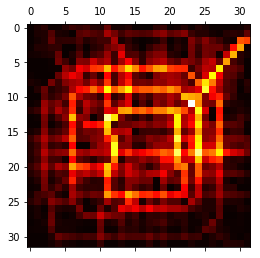

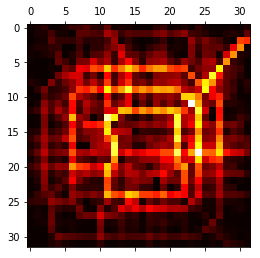

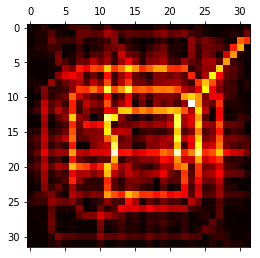

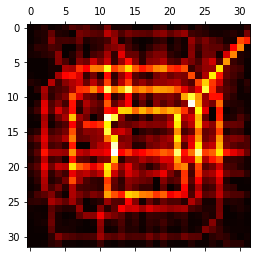

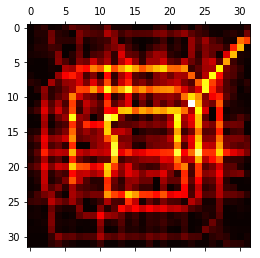

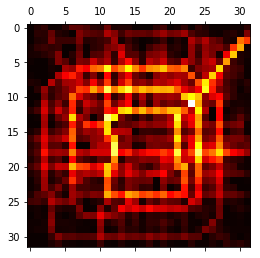

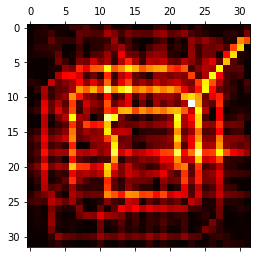

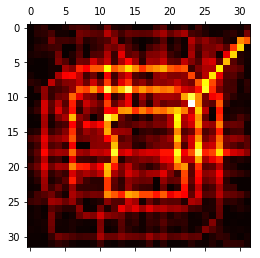

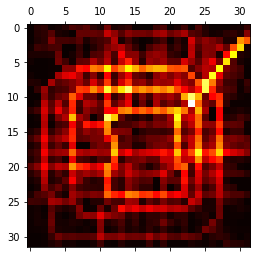

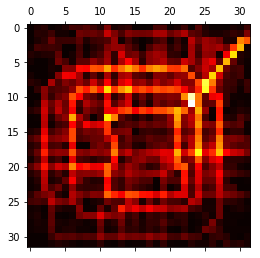

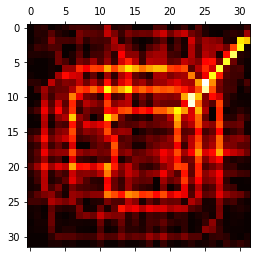

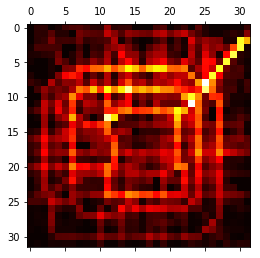

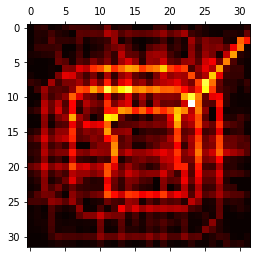

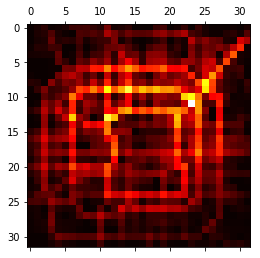

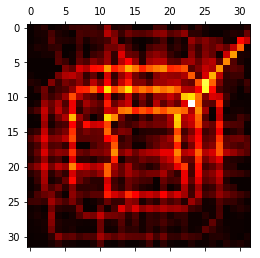

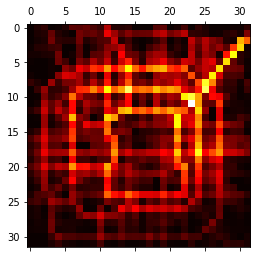

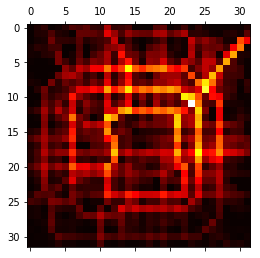

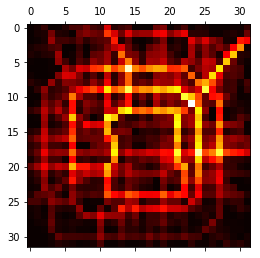

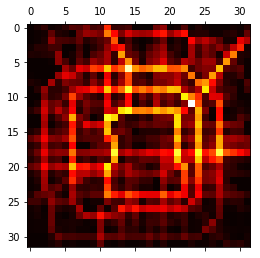

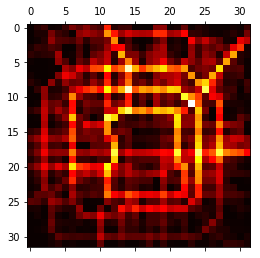

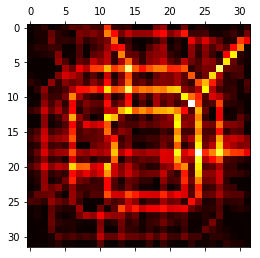

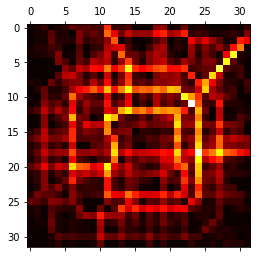

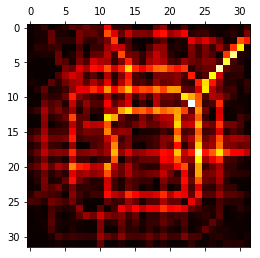

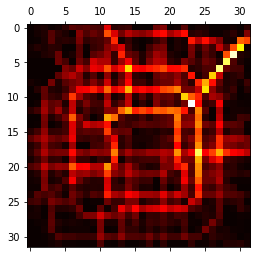

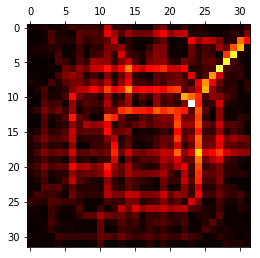

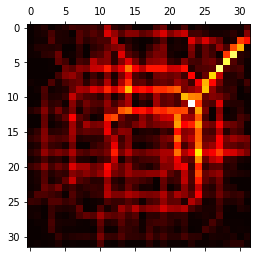

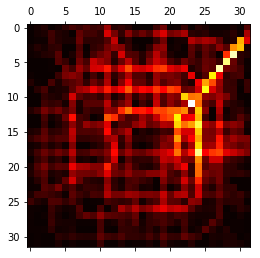

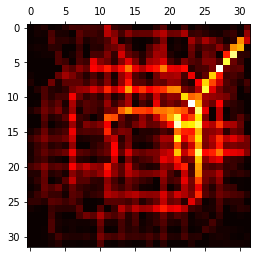

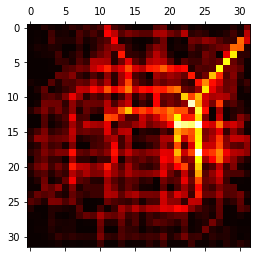

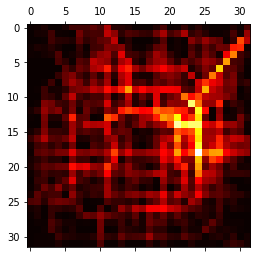

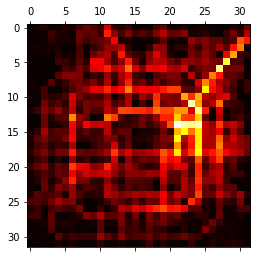

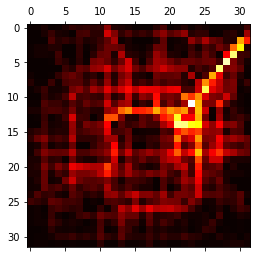

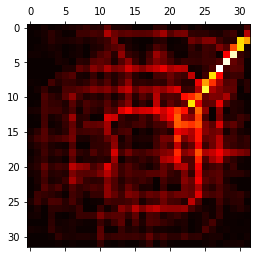

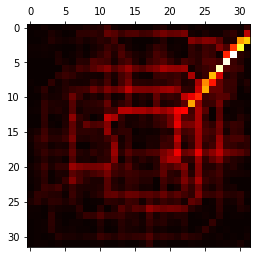

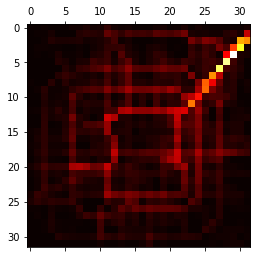

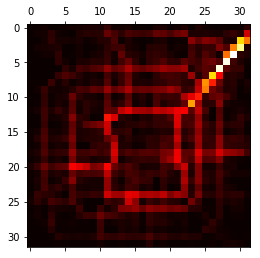

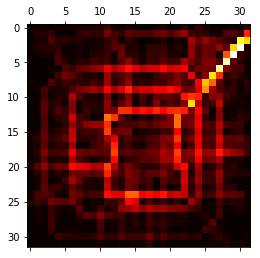

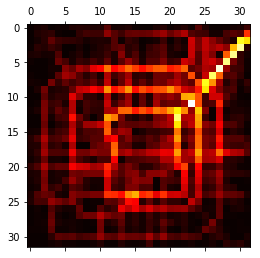

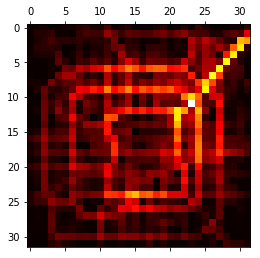

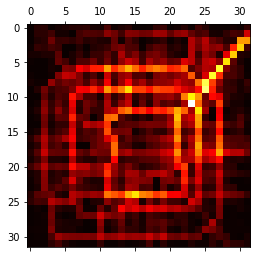

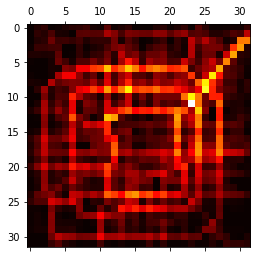

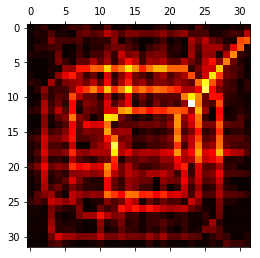

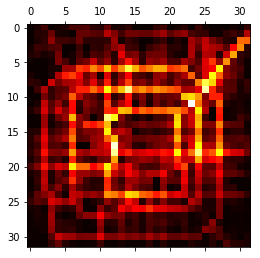

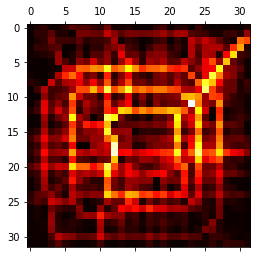

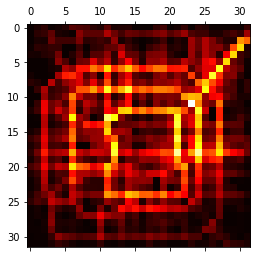

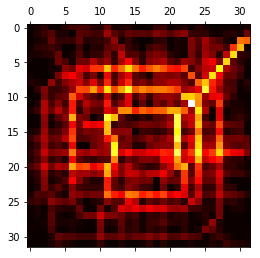

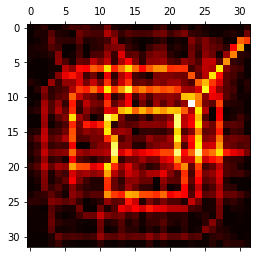

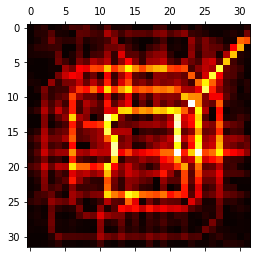

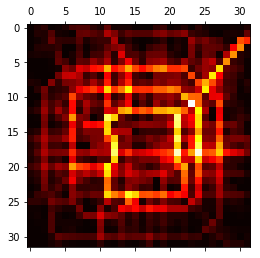

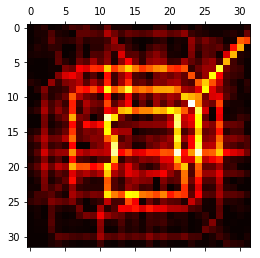

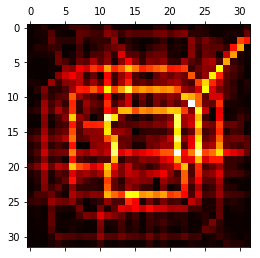

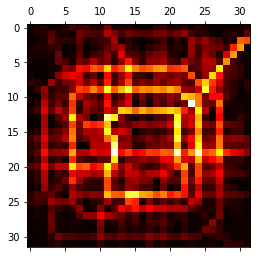

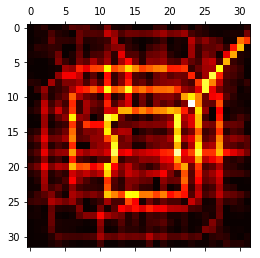

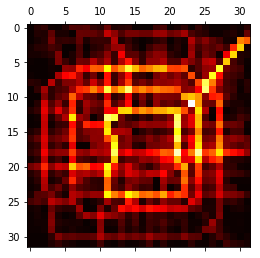

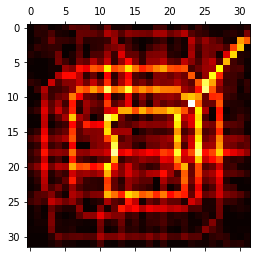

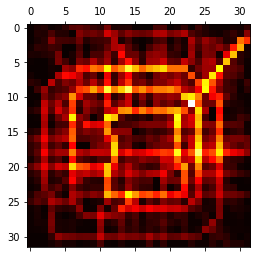

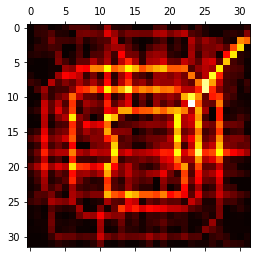

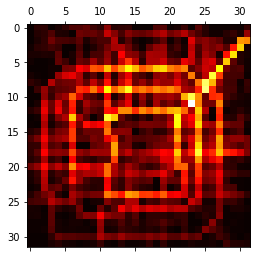

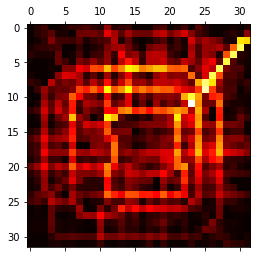

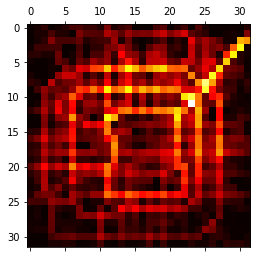

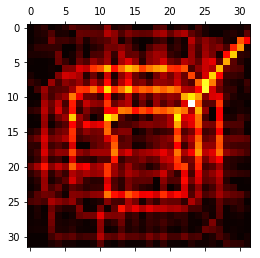

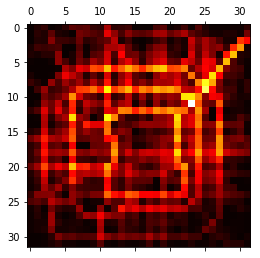

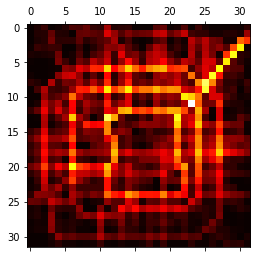

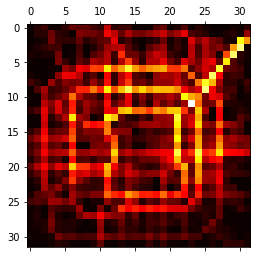

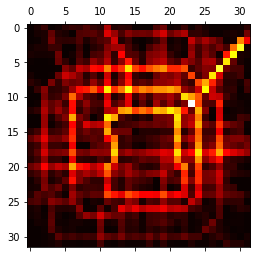

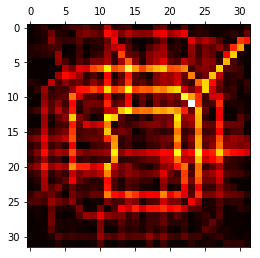

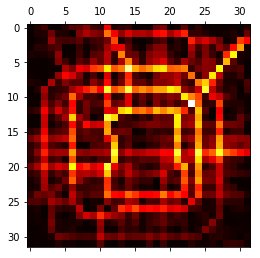

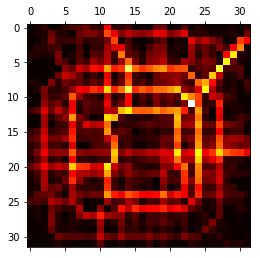

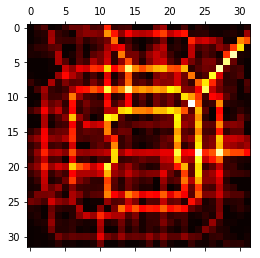

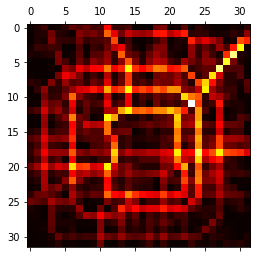

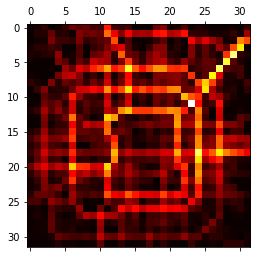

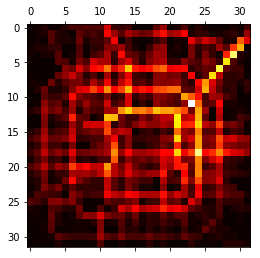

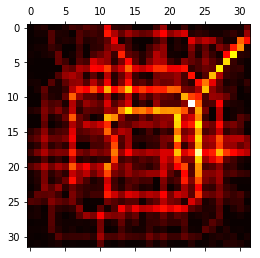

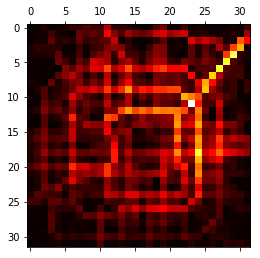

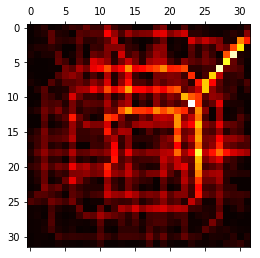

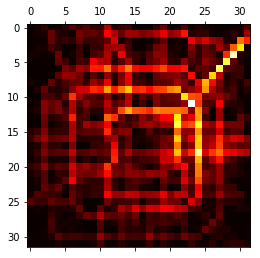

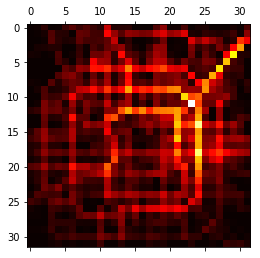

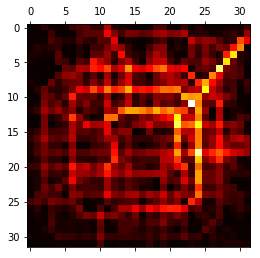

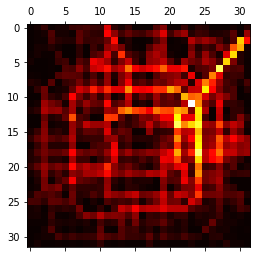

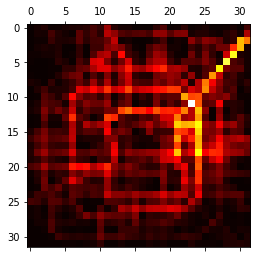

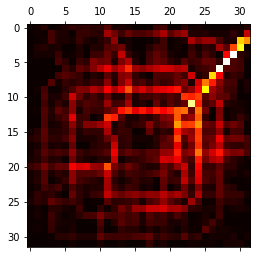

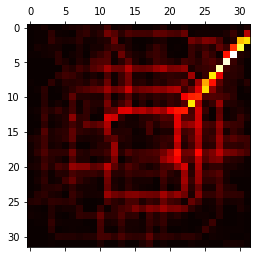

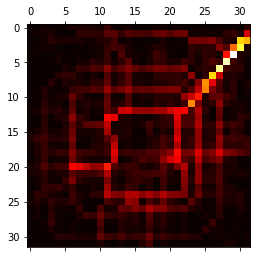

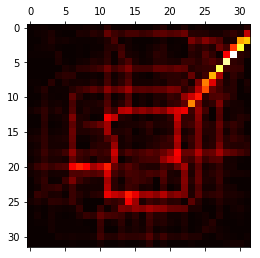

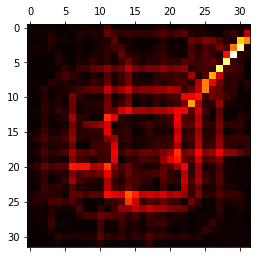

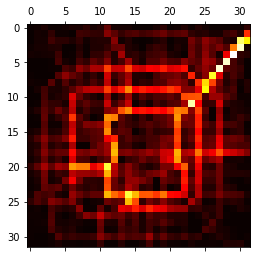

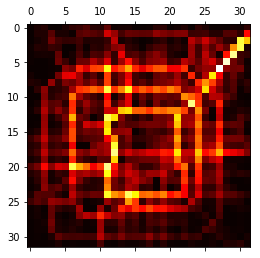

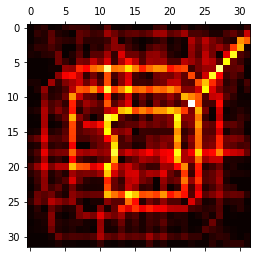

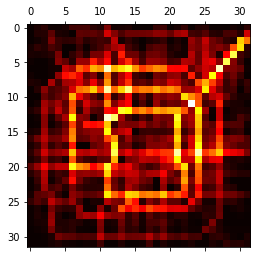

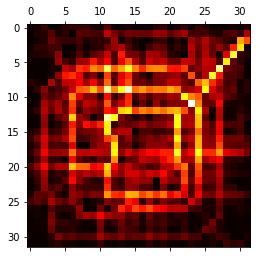

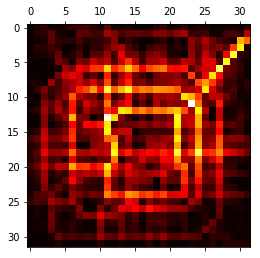

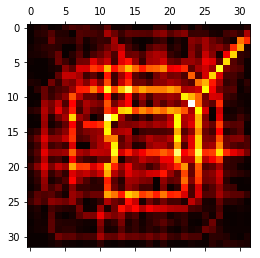

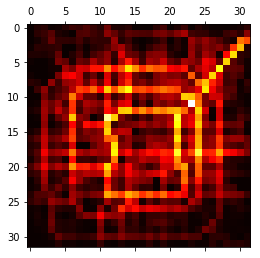

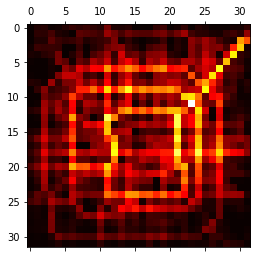

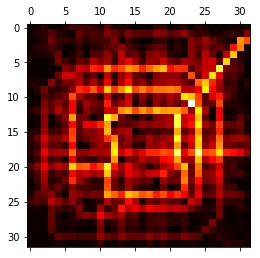

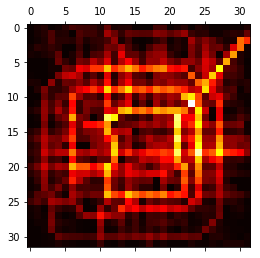

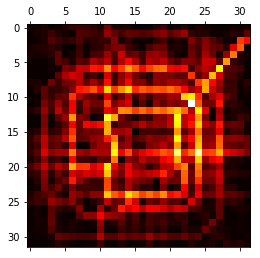

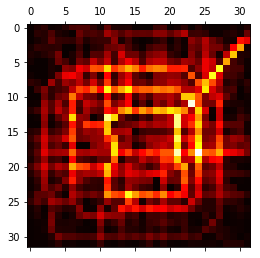

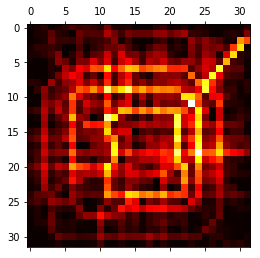

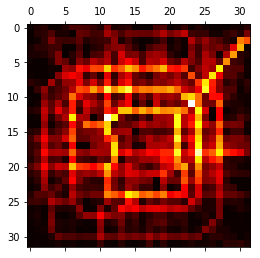

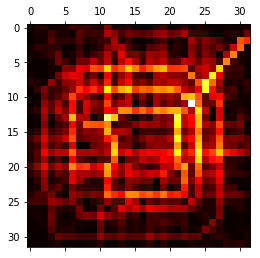

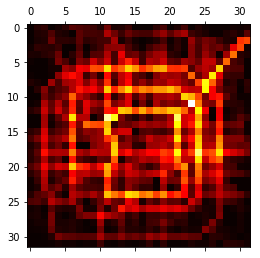

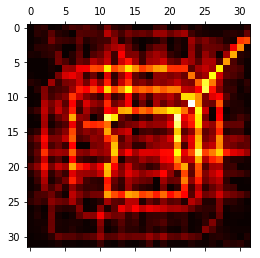

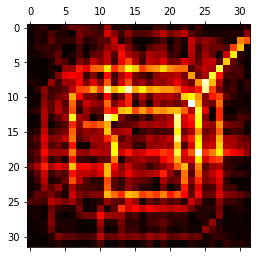

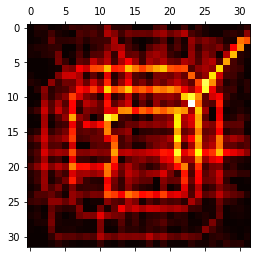

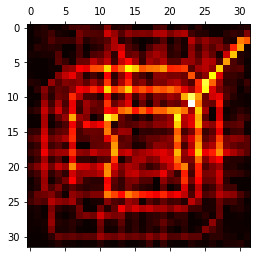

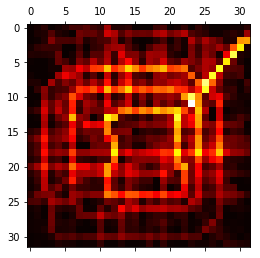

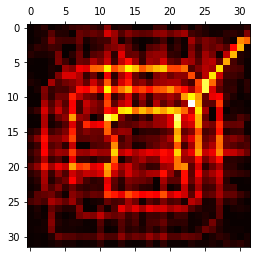

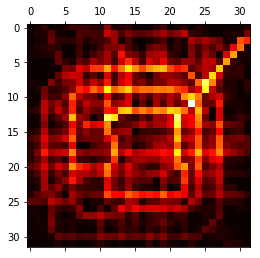

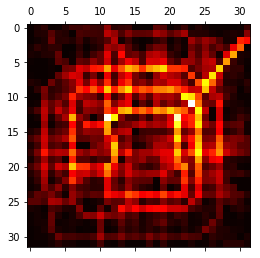

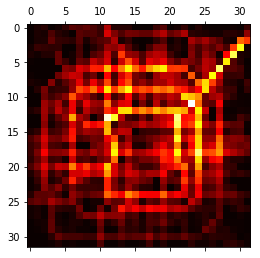

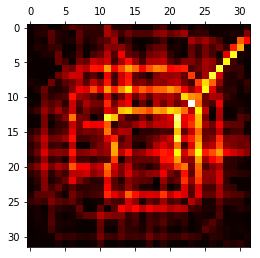

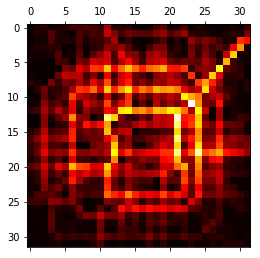

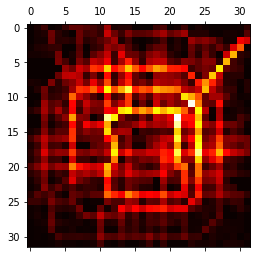

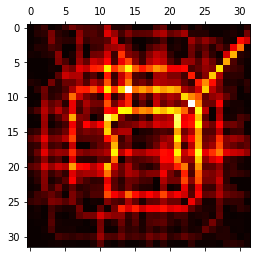

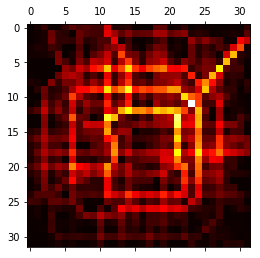

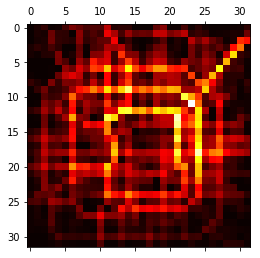

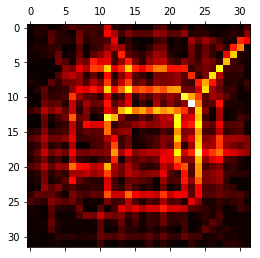

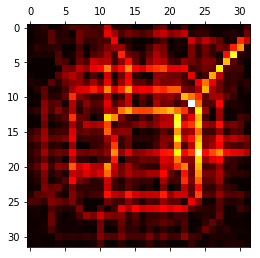

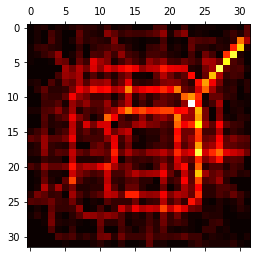

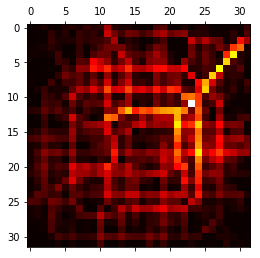

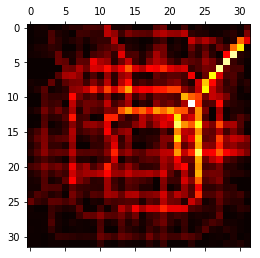

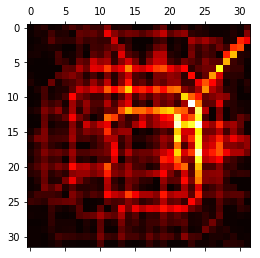

In [14]:
import matplotlib.pyplot as plt
for i in range(300):
    plt.matshow(reader['data'][i][0],cmap='hot')
    plt.savefig('../extra/heatmap/{}.jpg'.format(i))
# plt.matshow(reader['data'][100][0],cmap='hot')


   ![bj](img/bj.png)

        恩，果然是北京，这眼熟的框架,看来这样这数据的表示还是非常真实可靠的